In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch

In [21]:
import onnxruntime
filepath="model.onnx"
ort_session = onnxruntime.InferenceSession(filepath)
input_name = ort_session.get_inputs()[0].name
seismPath = "./"
n3,n2,n1=512,384,128
gx = np.load("/home1/max/3d-net/data_for_seminal/f3.npy")

gm = np.mean(gx)
gs = np.std(gx)
gx = gx-gm
gx = gx/gs
#gx = np.transpose(gx)
a=np.reshape(gx,(1,1,n1,n2,n3))
ort_inputs = {input_name: a}
ort_outs = ort_session.run(None, ort_inputs)

In [22]:
b=torch.from_numpy(ort_outs[0])
fp = torch.sigmoid(b).numpy()
fp=fp.squeeze()

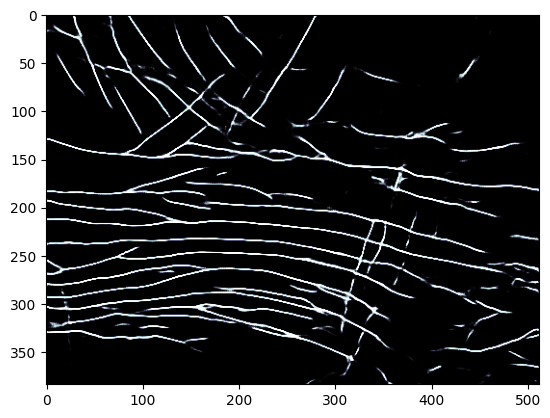

In [24]:
plt.imshow(fp[94,:,:],cmap="bone")